# CSCI 3022: Intro to Data Science - Fall 2017 Practicum 
***


This practicum is due on Moodle by **11:59pm on Wednesday December 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Toshal Ghimire

**Section**: 001
***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import random 
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### [40 points] Problem 1: Parking Problems 
***

Imagine that there are 50 parking spots on a street. A store is located at position 0, and each parking space along the street is numbered according to its distance from the store, so that the space right in front of the store is spot 0, the next is spot 1, and so on up until the end of the block, which is spot 49.

**Prof. Ketelsen is direct and systematic**. He enters the street and drives all the way to the store, which takes him 90 seconds. Then, he drives incrementally away from the store, taking 2 seconds for each parking spot that he checks. He parks in the first empty spot (after he checks it) and then walks to the store from there, covering ground at a rate of 5 seconds per parking spot. If Chris parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he makes it to the end of the road with not a single parking spot to be found, he parks in his secret spot, which is always free, but far away, which takes him an additional 5 minutes beyond the time he already spent using his parking strategy.

**Prof. Larremore is strategic and prone to overthinking**. He enters the street at the end, position 49, and starts driving toward the store, but checks each spot that he passes, taking 2 second to check each. But, in an attempt to be clever, he doesn’t park in the first spot he sees, because what if there’s a closer spot? Instead, he passes n empty spots and then parks in the next empty spot he sees (after he checks it). From where he parks on the street, he walks to the store at a speed of 5 seconds per parking spot. Just like Chris, if Dan parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he gets all the way to the store without parking, he parks in his own secret spot, which is always free, but not really close, which takes him an additional 3 minutes beyond the time he already spent using his parking strategy.

**Part A**: Write a function **chris_park_time**$(\hspace{.5mm}p)$ that performs a single trial and returns the total time, in seconds, for Chris to get to the store, given the probability that each spot is occupied by a car already, $p$. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [2]:

def chris_park_time(p,debug=False):
    
    #variables to store time
    seconds_to_store = 90
    second = 0
    walkTime = 0
    secretspot = True
    
    #creating list
    ps = np.random.choice(["Car","Empty"],50, p = [p,1 - p])
    
    if (debug == True):
        print(ps)
    
    for ii in range(len(ps)):
        if(ps[ii] == "Empty"):
            secretspot = False
            walkTime = (ii) * 5
            second += 2
            
            break
        else:
            second += 2

    
    total_sec = seconds_to_store + second + walkTime
    
    if(secretspot == True):
        total_sec = seconds_to_store + second 
        return total_sec + 300 #adding extra walk 
   
    
    return total_sec 




I used np.random.choice to fill an array with the probality $p$. I then run through the array with a **forloop** with an **if / else** statment inside to check if the spot is empty or occupied 

if its empty:
    
    we set the secret spot flag to false 
    we calcuated the walking distance from that parking spot 
    we add the 2 second check time
    and finaly exit the forloop 

if its not empty:
    
    we add 2 seconds for check time
    then move on to the next spot
    
if their is no spots at all, then we exit the forloop with the secret spot flag set to true, this means we return the max time witch is,

        time to store (90) + 5 mins extra walk (300)  + checktime (100) = 490

if there was a spot then we return 

    time to store (90) + walk time (list index * 5) + check time (SEE CODE)

In [3]:
#test chris_park_time(p)
'''
Test with the probality where 100% of the spots are occupied
would mean he would have to park in secret spot therefore:

Test should return 735
'''
#735 = driving to store(90) + check all lots(100)  + additional secret parking spot walk(300)
print("Test with 100% probality of spots being occupied\n  Expecting 490\n  Result: <",chris_park_time(1),"> \n")


'''
Test with the probality where 0% of the spots are occupied
would mean he would park in first spot & no walking therefore:

Test should return 92 
'''
#92 = drive to store(90) + check time for first spot(2)
print("Test with 0% probality of spots being occupied\n  Expecting 92\n  Result: <",chris_park_time(0),"> \n")



Test with 100% probality of spots being occupied
  Expecting 490
  Result: < 490 > 

Test with 0% probality of spots being occupied
  Expecting 92
  Result: < 92 > 



**Part B**: Write a function **dan_park_time**$(\hspace{.5mm}p, n)$ that performs a single trial and returns the total time, in seconds, for dan to get to the store, where $n$ is the number of empty spots he passes before taking the next available spot. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [4]:
def dan_park_time(p,n):
    #creating the parking lot
    ps = np.random.choice(["Car","Empty"],50, p = [p,1 - p])
    #print(ps,"\n\n")

    #variables to store time
    seconds_to_store = None
    seconds = 0 
    walktime = 0
    secretSpot = True
    
    for ii in range(len(ps)):
        if(ps[49-ii] == "Empty"):
            secretSpot = False
            n -= 1
            seconds +=2

            if (n < 0):
                #print(49 - ii)
                walktime = (49-ii) * 5
                break
        else:
            seconds +=2
    
    total_sec = seconds + walktime
    if (secretSpot == True):
        total_sec = seconds + 180
        return total_sec
    
    return total_sec



this function is the same as chris_park_time except the indexies are ps[49-ii] insead of pi[ii], also i used a counter and an if statment (if n< 0) so implement the number of cars he skips. everythint else is done the same was as before

In [5]:
#test dan_park_time(p)
'''
Test with the probality where 100% of the spots are occupied, and n = 20
would mean he would have to park in secret spot therefore:

Test should return 280
'''
#280 = check all lots(100) + additional secret parking spot walk(180)
print("Test with 100% probality of spots being occupied\n  Expecting 280\n  Result: <",dan_park_time(1,20),"> \n")


'''
Test with the probality where 0% of the spots are occupied, and n = 20
would mean he would park in parkingspot index 29 and therefore:

Test should return 187
'''
#187 = check all spots before reaching to lot Twenty-nine(40 + 2 form chosen spot) + walking remaining distance(145)
print("Test with 0% probality of spots being occupied\n  Expecting 187\n  Result: <",dan_park_time(0,20),"> \n")



Test with 100% probality of spots being occupied
  Expecting 280
  Result: < 280 > 

Test with 0% probality of spots being occupied
  Expecting 187
  Result: < 187 > 



**Part C**: Run simulations to evaluate their parking strategies on a sleepy Tuesday morning when the probability of a parking space being occupied is $p=0.6$.  Perform $1000$ trials each for Chris's strategy and Dan's strategy with parameters $n=1,2,$ and $3$. Plot 4 histograms, one on top of the other, for the resulting parking times with bin boundaries at $[0, 10, 20, \ldots, 300]$.  Be sure to label all axes and provide meaningful titles for each histogram.  Based on your histograms, which of the four strategies appears to be the best? 

In [6]:
#construction the trials 

def chris_trials(trials,p):
    df = pd.DataFrame(index = range(0,trials), columns = ["time"])
    for i in range(trials):
        x = chris_park_time(p)
        df.iloc[[i]] = x 
    
    return df
           
def dan_trails(trials,p,n):
    df = pd.DataFrame(index = range(0,trials), columns = ["time"])
    for i in range(trials):
        x = dan_park_time(p,n)
        df.iloc[[i]] = x 

    return df



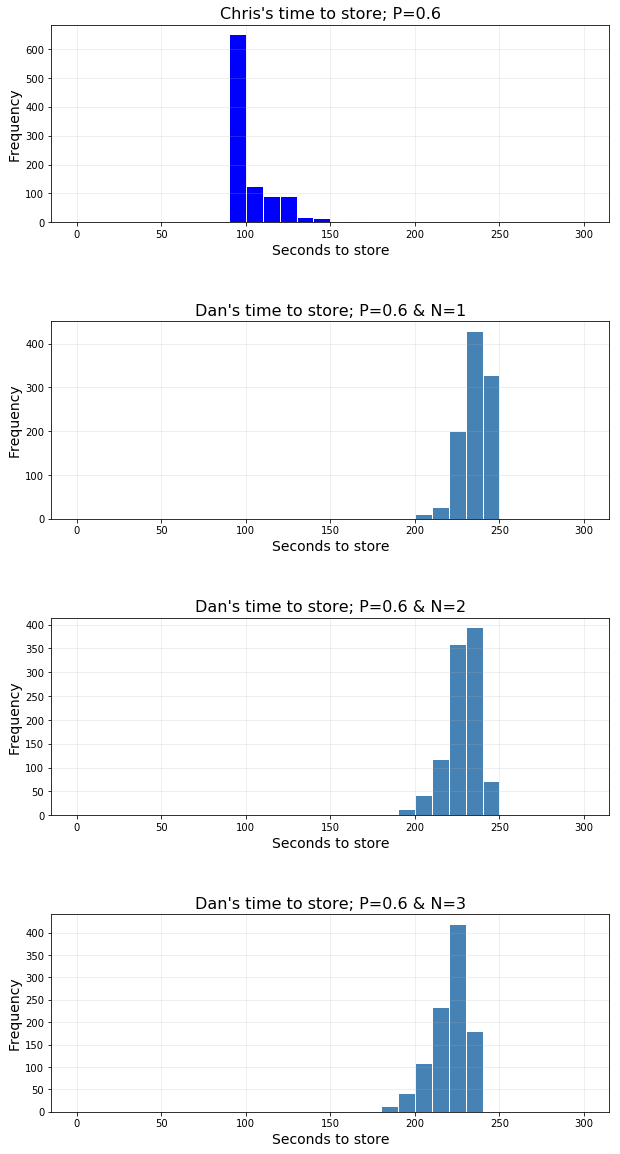

In [7]:
chris = chris_trials(1000,0.6)
dan_N1 = dan_trails(1000,0.6,1)
dan_N2 = dan_trails(1000,0.6,2)
dan_N3 = dan_trails(1000,0.6,3)

fig, ax = plt.subplots(nrows=4, ncols=1,figsize = (10,20))
fig.subplots_adjust(hspace=.5)
mybins = range(0,310,10)

chris.time.hist(ax=ax[0],facecolor="blue", edgecolor="white",bins=mybins)

dan_N1.time.hist(ax=ax[1],facecolor="steelblue", edgecolor="white",bins=mybins)
dan_N2.time.hist(ax=ax[2],facecolor="steelblue", edgecolor="white",bins=mybins)
dan_N3.time.hist(ax=ax[3],facecolor="steelblue", edgecolor="white",bins=mybins)


for i in range(4):
    ax[i].grid(alpha=0.25)
    ax[i].set_xlabel("Seconds to store",fontsize=14)
    ax[i].set_ylabel("Frequency", fontsize=14)
    
ax[0].set_title("Chris's time to store; P=0.6", fontsize=16)
ax[1].set_title("Dan's time to store; P=0.6 & N=1", fontsize=16)
ax[2].set_title("Dan's time to store; P=0.6 & N=2", fontsize=16)
ax[3].set_title("Dan's time to store; P=0.6 & N=3", fontsize=16)



Based on these four histograms, it seems like chris has the best strategy for quickest time to store at the probality of 0.6 

Even the worst time for chris is faster then the time it takes dan to reach the store

**Part D**: Run simulations with at least $1000$ trials and plot estimates of the expected parking time on a single graph for Chris's strategy and Dan's strategy with parameters $p=0.6$ and $n=0, 1, \ldots, 25$. Report the optimal parameter $n$ for Dan's strategy and use your plot to decide whose strategy is better. 

In [8]:
# i know we were only asked for n till 25, but i ploted until 
# thirty to  better understand the data visualy 

# since values are discrete, expected parkign time = mean

D = []
for i in range(30):
    avg = dan_trails(1000,0.6,i).time.mean()
    D.append(avg)

C = []
for i in range(30):
    avg = chris_trials(1000,0.6).time.mean()
    C.append(avg)
    


At n = 22 Dans time to store is less then chris


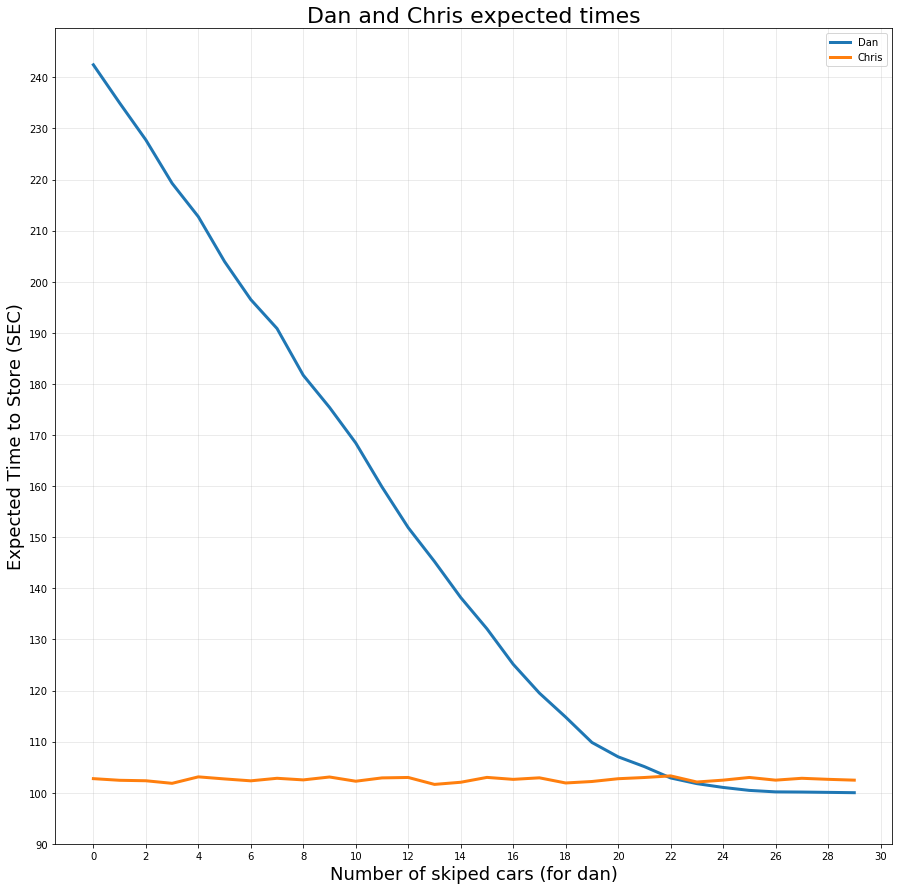

In [9]:
figs,ax = plt.subplots(figsize = (15,15))

plt.plot(D,linewidth=3.0,label="Dan");
plt.plot(C,linewidth=3.0,label="Chris");

ax.set_ylabel("Expected Time to Store (SEC)",fontsize = 18)
ax.set_xlabel("Number of skiped cars (for dan)", fontsize = 18)
ax.set_title("Dan and Chris expected times", fontsize = 22)
plt.xticks(range(0,31,2))
plt.yticks(range(90,250,10))
plt.grid(alpha=0.3)
plt.legend()

for i in range(30):
    if D[i] < C[i]:
        print("At n =",i,"Dans time to store is less then chris")
        break



I ran this trial a few times, and found that n $\approx$ 22 (very few trials it was 23) is the optimal number of cars to skip inorder for dans strategy to be better then chris

chirs strategy is better then dan by a signifcant ammount, but if dan were to find a parking spot after skiping ~22 empty spots then his strategy is slightly better

**Part E**: Repeat **Part C** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

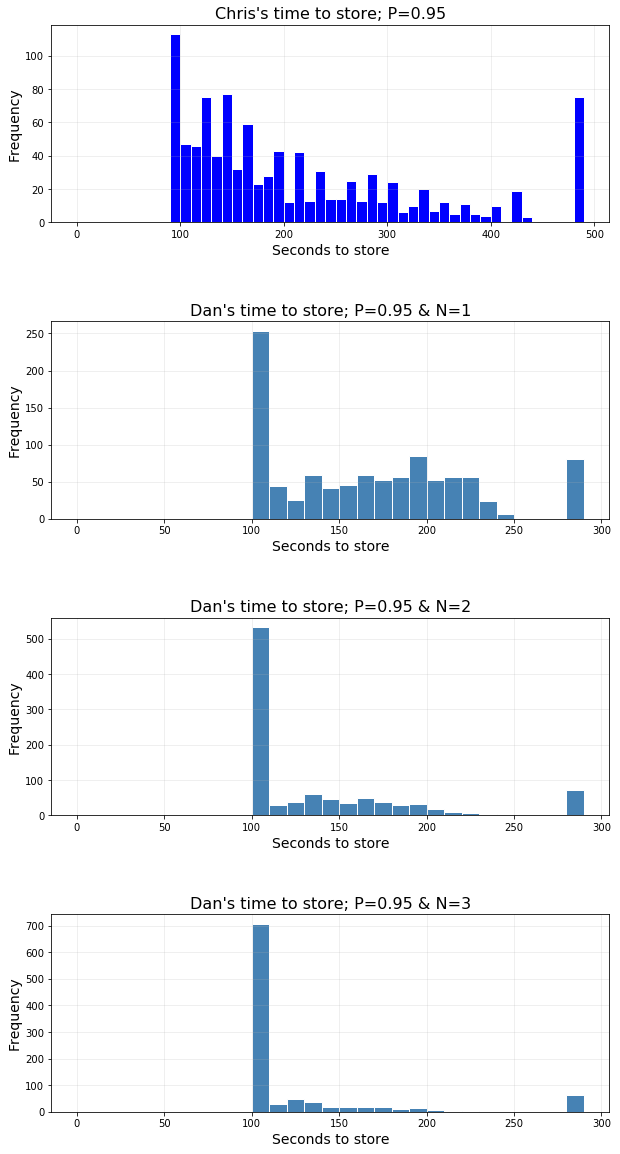

In [10]:
chris = chris_trials(1000,0.95)
dan_N1 = dan_trails(1000,0.95,1)
dan_N2 = dan_trails(1000,0.95,2)
dan_N3 = dan_trails(1000,0.95,3)

fig, ax = plt.subplots(nrows=4, ncols=1,figsize = (10,20))
fig.subplots_adjust(hspace=.5)
mybins = range(0,300,10)

#i increased the bin size here so we could see the worst case here (490)
# if we want to keep it consistant change range(0,500,10) to range(0,300,10)
chris.time.hist(ax=ax[0],facecolor="blue", edgecolor="white",bins=range(0,500,10))

dan_N1.time.hist(ax=ax[1],facecolor="steelblue", edgecolor="white",bins=mybins)
dan_N2.time.hist(ax=ax[2],facecolor="steelblue", edgecolor="white",bins=mybins)
dan_N3.time.hist(ax=ax[3],facecolor="steelblue", edgecolor="white",bins=mybins)


for i in range(4):
    ax[i].grid(alpha=0.25)
    ax[i].set_xlabel("Seconds to store",fontsize=14)
    ax[i].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Chris's time to store; P=0.95", fontsize=16)
ax[1].set_title("Dan's time to store; P=0.95 & N=1", fontsize=16)
ax[2].set_title("Dan's time to store; P=0.95 & N=2", fontsize=16)
ax[3].set_title("Dan's time to store; P=0.95 & N=3", fontsize=16);



with probality of cars being occupied being 0.95, from the histograms dan seems to have a better stragtey for parking

**Part F**: Repeat **Part D** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

In [11]:
# i know we were only asked for n till 25, but i ploted until 
# thirty to  better understand the data visualy 

D = []
for i in range(25):
    avg = dan_trails(1000,0.95,i).time.mean()
    D.append(avg)

C = []
for i in range(25):
    avg = chris_trials(1000,0.95).time.mean()
    C.append(avg)


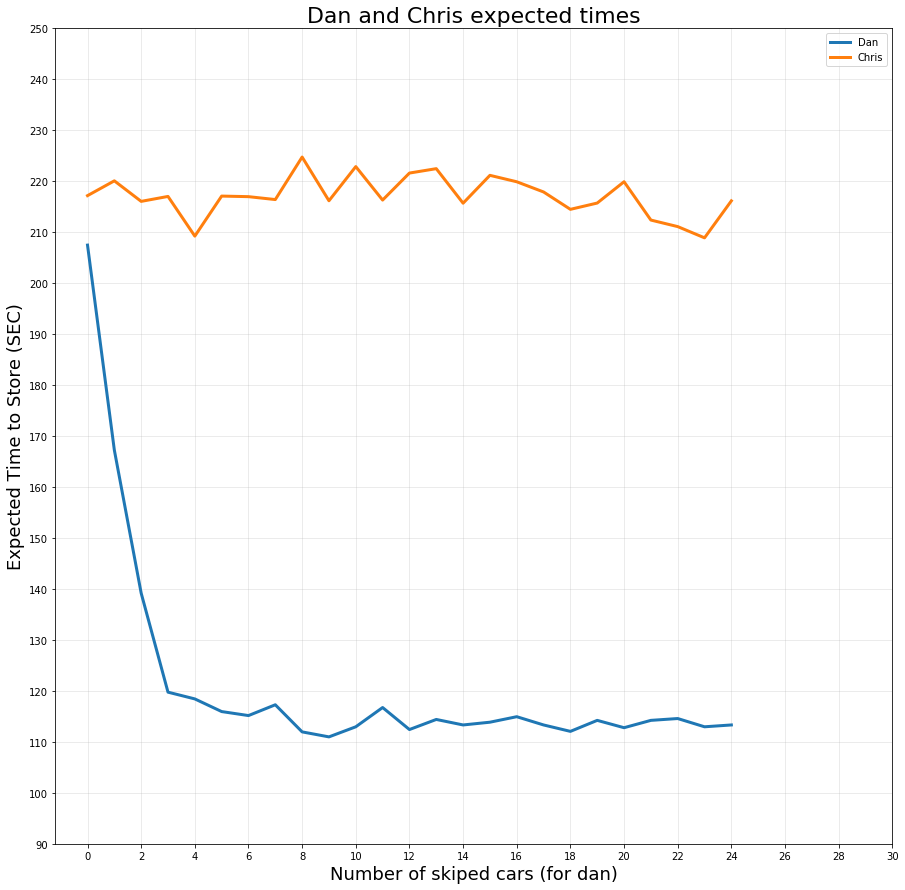

In [12]:
figs,ax = plt.subplots(figsize = (15,15))

plt.plot(D,linewidth=3.0,label="Dan");
plt.plot(C,linewidth=3.0,label="Chris");

ax.set_ylabel("Expected Time to Store (SEC)",fontsize = 18)
ax.set_xlabel("Number of skiped cars (for dan)", fontsize = 18)
ax.set_title("Dan and Chris expected times", fontsize = 22)
plt.xticks(range(0,31,2))
plt.yticks(range(90,260,10))
plt.grid(alpha=0.3)
plt.legend();



**Part G**: Analytically determine a formula for Chris's expected parking time as a function of the parameter $p$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

chris stragtey follows the geometic distribution 

given p = probility of success

E[x] = $\frac{1}{p}$  = number of failurs before success

**Expected time =$ 90 + (\frac{1}{p})~2 + (\frac{1}{p})~5$**

since he checks for 2 seconds for each number of faliures, and walks that same distance back, we sum 2 * $\frac{1}{p}$ + 5 *$\frac{1}{p}$ plus the additional 90

**form the function i coded below, it seems like the expected value is $\pm$ 10 from the results from part D and F**

In [13]:
def function_chris(p):
    drive_time = 90
    numOfFaliures_beforeSuccess = (1/(1-p))
    
    A = drive_time + (numOfFaliures_beforeSuccess)*2 + (numOfFaliures_beforeSuccess)*5
    return A

print("At 95% chance of spot being occupied the expected time is: ",function_chris(.95))
print("At 60% chance of spot being occupied the expected time is: ",function_chris(.6))



At 95% chance of spot being occupied the expected time is:  229.9999999999999
At 60% chance of spot being occupied the expected time is:  107.5


**Part H**: Analytically determine a formula for Dan's expected parking time as a function of parameters $p$ and $n$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

Dans stragtey follows the negative binomal 

so the expected value is $\frac{n}{P}$ this is the expected number of trials until Nth success

**E[x] = $\frac{n}{P}$*2 + (50 - $\frac{n}{P}$)*5**

since he checks for 2 seconds until he finds nth success, and will have to walk the remaining distance from 50 - number of trials at the rate of 5 secs per spot

In [14]:
def function_dan(p,n):
    trials_to_get_n_success = n / p
    check = trials_to_get_n_success * 2
    walk = (50-trials_to_get_n_success)*5
    return check + walk


print("At 60% and n = 1 dans Expected value is: ",function_dan(0.6,1))
print("At 95% and n =1 dans Expected value is: ",function_dan(0.95,1))

print("\nAt 60% and n = 22 dans Expected value is: ",function_dan(0.6,22))
print("At 95% and n = 22 dans Expected value is: ",function_dan(0.95,22))



At 60% and n = 1 dans Expected value is:  245.00000000000003
At 95% and n =1 dans Expected value is:  246.8421052631579

At 60% and n = 22 dans Expected value is:  140.0
At 95% and n = 22 dans Expected value is:  180.5263157894737


**My formulas from G and H dont quiet agree with the graphs from D and F, its around the same ball park, except its lower, I believe this is beacuse the secret spot for both chris and dan Skew the results to be higher in the graphs, and i did not incorporate the secretspot for the expected time formulas**

**Part I**: Use the formulas you found in **Parts G** and **H** to make an argument about whose strategy is better — and, if the answer is it depends, explain which values of $p$ and/or $n$ allow Chris to get to the store faster than Dan. Provide any graphical summaries necessary to justify your conclusion. 

**Note**: While we hope that you come up with correct analytic formulas in **Parts G** and **H**, you may feel free to use the code written above to do this analysis using simulation estimates. 

The answer is it depends. it depends on both P and N, From the graph in part D with p=.6, you can clearly see that chris's stragety is better beacuse its constant around the time it takes to store to be 102.5, but  Dans stragtey is slighty faster then chris's if he can find a spot after checking $\approx$ 22 spots. also from part F dans stragtey is better if the probality of spots occupied is higer. 

### [30 points] Problem 2: Gender Balance in Movements Between Academic Disciplines
***

Every year, the online academic resume service, ORCID, dumps the data from all of the professors who have their privacy settings set to “public” so that the research community can learn about the makeup of the academic workforce. In this real-data problem, we’re going to study the flows of professors between different academic fields to learn about gender differences. We’ll use a pre-processed dataset used by actual researchers studying gender imbalance across fields.

First, some information about the data. For each of the 1.6 million professors in the public ORCID data dump, the researchers determined (a) what field they are currently in, (b) what field they did their PhD in, and (c) their gender. Here, because the goal of the study was originally to learn about disparities between men and women, gender was coded by the researchers as male or female, as indicated by the professors. Those who chose not to mark their gender as public were not included in the processed dataset.

The researchers have provided CSCI 3022 with two files: **totals.csv** and **switch_edgelist.csv**. The first file enumerates the total numbers of men and women in each of $30$ different fields. The second file enumerates the total numbers of men and women who switched from one field to another field during their career.

The null hypothesis about the data is that the gender balance of people leaving field $X$ is the same as the gender balance in field $X$. For example, if Anthropology is $50\%$ women and $50\%$ men, we expect people who have moved from Anthropology to another field to reflect this $50/50$ balance. On the other hand, if Physics is only $15\%$ women and $85\%$ men, we expect people who have moved from Physics to another field to reflect a $15/85$ balance.

In symbolic form, we might write this as follows. Let the proportion of professors in field i who are women be given by $p_i$, and let the proportion of women who move from field i to some other field be given by $q_i$. Then the expected result is that $p_i$ = $q_i$. The researchers are interested to know if there is statistical evidence that $p_i \neq q_i$ for any of the fields $i$.

**Part A**: Wrangle those data files. Then, make a plot of $p_i$ for all $i = 1, 2, \ldots, 30$ fields using a green color, and on the same axes, plot $q_i$ using a blue color.

In [15]:
import warnings
warnings.filterwarnings('ignore')

total = pd.read_csv('data/totals.csv')
total_w = total.loc[total["gend_cat"] =="female"]


switch = pd.read_csv('data/switch_edgelist.csv')
switch_w = switch.loc[switch.gend_cat =="female"]

df = total_w

In [16]:
#finding p

sum_f = df.N.sum()

df["p"] = df["N"] / sum_f

#finding q
'''
This code takes along time to run (its doing joins)
'''
Sum_Proff_S = switch_w.N.sum()

for i in total_w.field:
    df.loc[df.field == i,"Total_switch"] = switch_w.N.loc[switch_w["from"] == i ].sum()
    df.loc[df.field == i,"q"] = (switch_w.N.loc[switch_w["from"] == i ].sum())/ Sum_Proff_S




In [17]:
print("Total sum of female proffesors",sum_f)
print("Total sum of female proffesors who switched",Sum_Proff_S)

df.head()

Total sum of female proffesors 65887
Total sum of female proffesors who switched 9214


,idx,field,gend_cat,N,p,Total_switch,q
25,26,engineering,female,10528,0.159789,930.0,0.100933
26,27,computer science,female,2585,0.039234,388.0,0.042110
27,28,mathematics,female,3416,0.051846,663.0,0.071956
28,29,chemistry,female,6085,0.092355,865.0,0.093879
29,30,education,female,6133,0.093084,720.0,0.078142


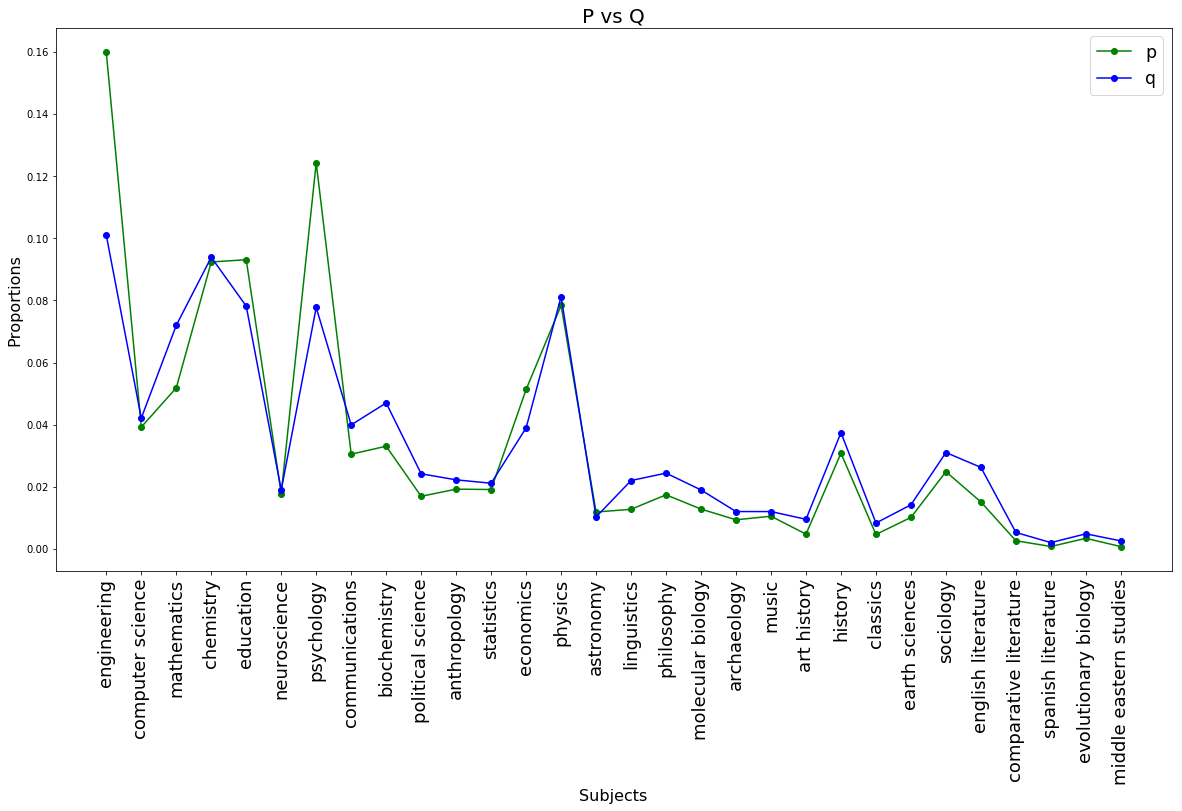

In [18]:
figs, ax = plt.subplots(figsize=(20,10))

plt.plot(range(0,30,1),df.p,color="green",label="p",marker="o")
plt.plot(range(0,30,1),df.q,color="blue",label="q",marker="o")

ax.set_xlabel("Subjects",fontsize=16)
ax.set_ylabel("Proportions",fontsize=16)
ax.set_title("P vs Q",fontsize=20)
ax.set_xticks(range(0,30,1))
ax.set_xticklabels(df.field,rotation='vertical', fontsize=18)

plt.legend(fontsize = 'xx-large');


**Part B**: At the $\alpha = 0.05$ significance level, use the method of your choice to determine whether there is sufficient evidence that $p_i \neq q_i$. Be sure to explain why you are justified in using the method that you used, and report the numbers that helped you make your decision for each of the fields. Please use only methods we have discussed in class. Then, replicate your plot from **Part A** and add a red symbol to those fields, if any, where $p_i$ and $q_i$ are statistically different at the given significance level. Comment on any significant findings.  

$H_0: p_i=q_i$

$H_1: p_i\ne q_i$

$$ P = \frac{(p_1~n_1 + p_2~n_2)}{n_1 + n_2} $$

$$ SE = \sqrt{P ~(1-P)~(\frac{1}{n_1} + \frac{1}{n_2})} $$

$$ Z = \frac{P_1 + P_2}{SE} $$

we compare that z value to the stats.norm.ppf($\alpha$) and if its greater then that value or less then -stats.norm.ppf($\alpha$) then we reject the null hypothesis


In [19]:
stats.norm.ppf(0.025)

-1.9599639845400545

In [20]:
n1 = sum_f
n2 = Sum_Proff_S
n = df.p.count() 

P = df.p * n1

a = (df.p*n1 + df.q*n2)/(n1+n2)
SE = np.sqrt(a *(1-a)*(1/n1 + 1/n2))

z = (df.p - df.q)/SE

df["Zvalue"] = z.to_frame()
z_alpha = stats.norm.ppf(0.05/2)

dfC = df

df["reject"] = 0
df.reject.loc[(df.Zvalue > 1.9599639845400545) | (df.Zvalue < -1.9599639845400545)] = 1
#1.9599639845400545 is the z value of alpha signifiacant of 0.05

In [21]:
#making a table for red symbols in witch we reject the the null hypothies

for i in df: 
    df.loc[df.reject == 1,"RedSymbol_q"] = df.q
    df.loc[df.reject == 1,"RedSymbol_p"] = df.p

In [56]:
df.head()

,idx,field,gend_cat,N,p,Total_switch,q,Zvalue,reject,RedSymbol_q,RedSymbol_p
25,26,engineering,female,10528,0.159789,930.0,0.100933,14.716454,1,0.100933,0.159789
26,27,computer science,female,2585,0.039234,388.0,0.042110,-1.326127,0,NaN,NaN
27,28,mathematics,female,3416,0.051846,663.0,0.071956,-7.977598,1,0.071956,0.051846
28,29,chemistry,female,6085,0.092355,865.0,0.093879,-0.472762,0,NaN,NaN
29,30,education,female,6133,0.093084,720.0,0.078142,4.665092,1,0.078142,0.093084


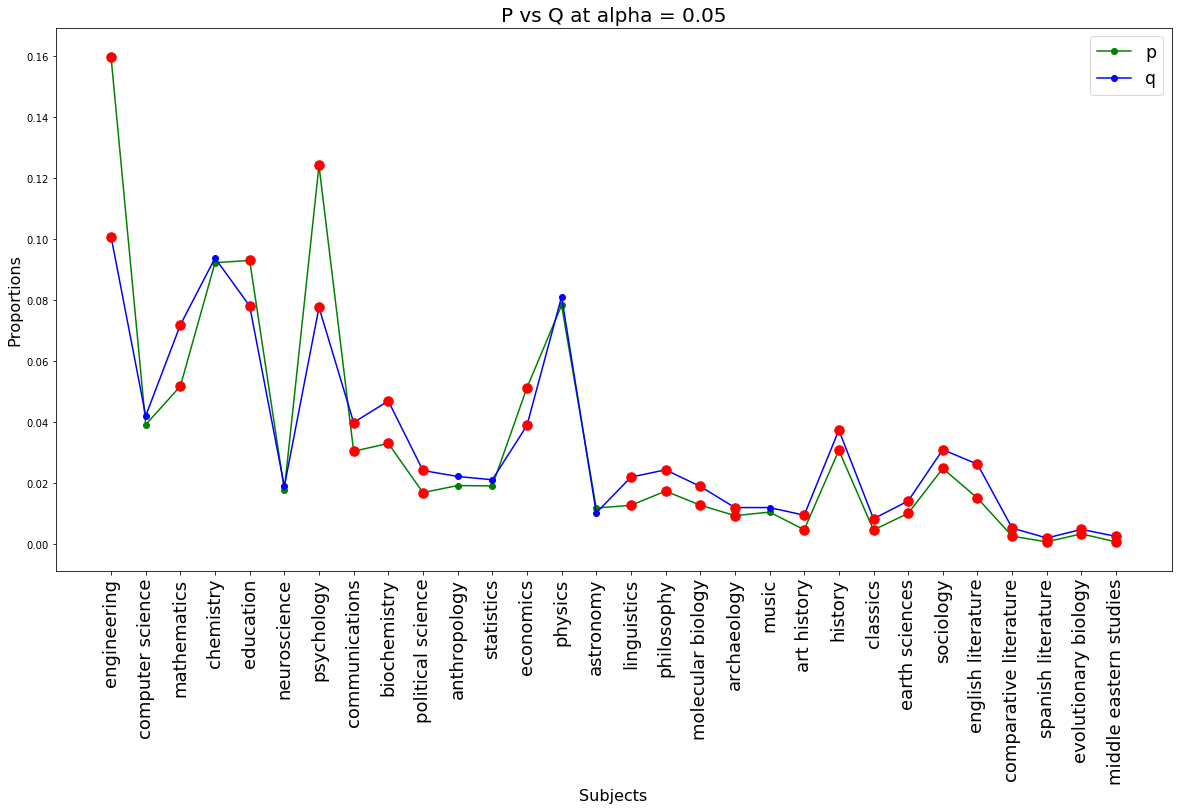

In [23]:
figs, ax = plt.subplots(figsize=(20,10))



#normal plot
plt.plot(range(0,30,1),df.p,color="green",label="p",marker="o")
plt.plot(range(0,30,1),df.q,color="blue",label="q",marker="o")

ax.set_xlabel("Subjects",fontsize=16)
ax.set_ylabel("Proportions",fontsize=16)
ax.set_title("P vs Q at alpha = 0.05",fontsize=20)
ax.set_xticks(range(0,30,1))
ax.set_xticklabels(df.field,rotation='vertical', fontsize=18)

plt.legend(fontsize = 'xx-large');

#ploting red lines
plt.scatter(range(0,30,1),df.RedSymbol_p, color='r',s=90,zorder=3)
plt.scatter(range(0,30,1),df.RedSymbol_q, color='r',s=90,zorder=3)

The red dots are the points whose we rejected the Null hypothesis of $ p_i = q_i $ at the alpha 0.05 significant level

**Part C**: Repeat the procedure from **Part B** at the $\alpha = 0.01$ level. 

In [24]:
totalC = pd.read_csv('data/totals.csv')
total_wC = total.loc[total["gend_cat"] =="female"]


switchC = pd.read_csv('data/switch_edgelist.csv')
switch_wC = switch.loc[switch.gend_cat =="female"]

dfC = total_wC

#finding p

sum_fC = dfC.N.sum()

dfC["p"] = dfC["N"] / sum_fC

#finding q
'''
This code takes along time to run (its doing joins)
'''
Sum_Proff_SC = switch_wC.N.sum()

for i in total_wC.field:
    dfC.loc[dfC.field == i,"Total_switch"] = switch_wC.N.loc[switch_wC["from"] == i ].sum()
    dfC.loc[dfC.field == i,"q"] = (switch_wC.N.loc[switch_wC["from"] == i ].sum())/ Sum_Proff_SC


n1C = sum_fC
n2C = Sum_Proff_SC
nC = dfC.p.count() 

PC = dfC.p * n1C

aC = (dfC.p*n1 + dfC.q*n2)/(n1C+n2C)
SE_C = np.sqrt(aC *(1-aC)*(1/n1C + 1/n2C))

zC = (dfC.p - dfC.q)/SE_C

dfC["Zvalue"] = zC.to_frame()
z_alphaC = stats.norm.ppf(0.01/2)
print("Z alpha value is: ",z_alphaC)

dfC.head()

Z alpha value is:  -2.57582930355


,idx,field,gend_cat,N,p,Total_switch,q,Zvalue
25,26,engineering,female,10528,0.159789,930.0,0.100933,14.716454
26,27,computer science,female,2585,0.039234,388.0,0.042110,-1.326127
27,28,mathematics,female,3416,0.051846,663.0,0.071956,-7.977598
28,29,chemistry,female,6085,0.092355,865.0,0.093879,-0.472762
29,30,education,female,6133,0.093084,720.0,0.078142,4.665092


In [25]:
dfC["reject"] = 0
dfC.reject.loc[(dfC.Zvalue > 2.57582930355) | (dfC.Zvalue < -2.57582930355)] = 1
#2.57582930355 is the z value of alpha signifiacant of 0.05

#making a table for red symbols in witch we reject the the null hypothies

for i in dfC: 
    dfC.loc[dfC.reject == 1,"RedSymbol_q"] = dfC.q
    dfC.loc[dfC.reject == 1,"RedSymbol_p"] = dfC.p

,idx,field,gend_cat,N,p,Total_switch,q,Zvalue,reject,RedSymbol_q,RedSymbol_p
25,26,engineering,female,10528,0.159789,930.0,0.100933,14.716454,1,0.100933,0.159789
26,27,computer science,female,2585,0.039234,388.0,0.042110,-1.326127,0,NaN,NaN
27,28,mathematics,female,3416,0.051846,663.0,0.071956,-7.977598,1,0.071956,0.051846
28,29,chemistry,female,6085,0.092355,865.0,0.093879,-0.472762,0,NaN,NaN
29,30,education,female,6133,0.093084,720.0,0.078142,4.665092,1,0.078142,0.093084


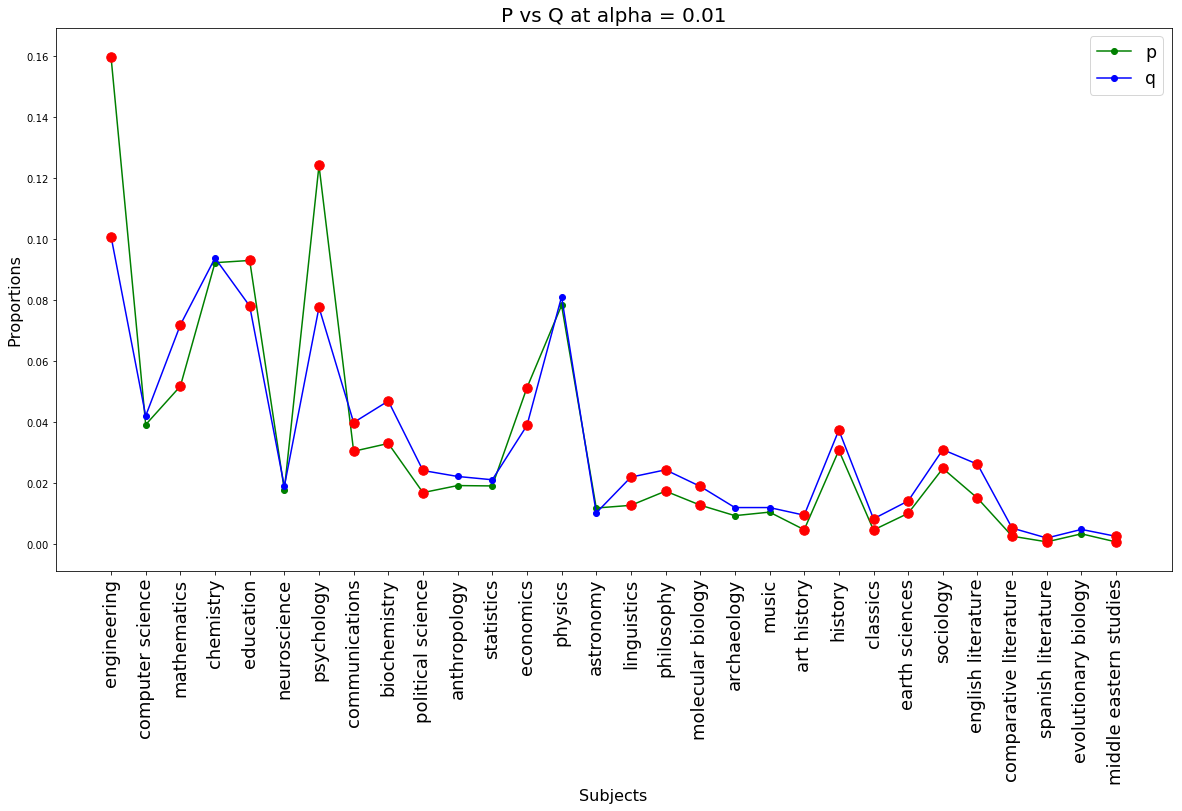

In [26]:
figs, ax = plt.subplots(figsize=(20,10))



#normal plot
plt.plot(range(0,30,1),dfC.p,color="green",label="p",marker="o")
plt.plot(range(0,30,1),dfC.q,color="blue",label="q",marker="o")

ax.set_xlabel("Subjects",fontsize=16)
ax.set_ylabel("Proportions",fontsize=16)
ax.set_title("P vs Q at alpha = 0.01",fontsize=20)
ax.set_xticks(range(0,30,1))
ax.set_xticklabels(dfC.field,rotation='vertical', fontsize=18)

plt.legend(fontsize = 'xx-large');

#ploting red lines
plt.scatter(range(0,30,1),dfC.RedSymbol_p, color='r',s=90,zorder=3)
plt.scatter(range(0,30,1),dfC.RedSymbol_q, color='r',s=90,zorder=3)

dfC.head()

at this significant level, i noticed that 2 values (archaeology & evolevolutionary biology) have accepted the null hypothesis, where in previous graph from part B, those fields rejected the null hypothesis 

### [30 points] Problem 3: Multiple Linear Ralphie-gression 
***

After years of study and professional development, you have finally landed your dream job as Ralphie's data-driven lead handler.  As your first project, you wish to use multiple linear regression to understand and predict what makes Ralphie happy, as measured during halftime of home football games.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file ralphie.csv. 

**Response**: 

- $\texttt{happiness}$: Ralphie's happiness, measured by a complicated formula involving rate of tail flicks, happy-sounding snorts, and numerous other factors 

**Features**: 

- $\texttt{hay freshness}$: freshness of Ralphie's hay, measured in Freshies 
- $\texttt{coat silkiness}$: silkiness of Ralphie's coat, measured in Larremores 
- $\texttt{run length}$: the length of Ralphie's halftime run, measured in yards 
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{SCMLP}$: the snow-capped majesty of Longs Peak, measured as a fraction between 0 and 1  
- $\texttt{mean GPA}$: mean GPA of Ralphie's handlers 
- $\texttt{score diff}$: the score differential (CU's score minus Opponent' score) at halftime 
- $\texttt{star yards}$: the number of rushing yards by CU's star running back at halftime 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the concession stand 
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on game day 


**Part A**: Read the data from **ralphie.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [27]:
ralphie = pd.read_csv("data/ralphie.csv")
ralphie.head()

,happiness,hay freshness,coat silkiness,run length,temp,SCMLP,handler GPA,score diff,star yards,ice cream sold,shark attacks
0,138.70,89.1ƭ,6.8ɭ,263.0,62℉,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4ƭ,8.0ɭ,264.0,63℉,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9ƭ,7.6ɭ,243.0,55℉,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1ƭ,6.0ɭ,260.0,52℉,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6ƭ,8.1ɭ,251.0,57℉,0.89,2.40,-6.0,43.0,186.0,0.0


In [28]:
# runing this code twice will result in error since dataframe will be changed 

# Drop all rows with Nan values
ralphie = ralphie.dropna(axis=0)

# Clean Hay Freshness
ralphie["hay freshness"] = ralphie["hay freshness"].str.strip('ƭ')
ralphie["hay freshness"] = ralphie["hay freshness"].convert_objects(convert_numeric=True)

# Clean Coat Silkiness
ralphie["coat silkiness"] = ralphie["coat silkiness"].str.strip('ɭ')
ralphie["coat silkiness"] = ralphie["coat silkiness"].convert_objects(convert_numeric=True)

# Clean Temp 
ralphie["temp"] = ralphie["temp"].str.strip('℉')
ralphie["temp"] = ralphie["temp"].convert_objects(convert_numeric=True)

In [29]:
import statsmodels.api as sm
ralphie.head()

,happiness,hay freshness,coat silkiness,run length,temp,SCMLP,handler GPA,score diff,star yards,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57,0.89,2.40,-6.0,43.0,186.0,0.0


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

$H_0: \beta_1 + \beta_2 + \beta_3 +... + \beta_n = 0 $

$H_1: \beta_k \ne 0 $ for at least one k 

In [30]:
y , x = ralphie["happiness"], ralphie.iloc[:,1:]

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           8.10e-66
Time:                        12:21:31   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011     -62.210      -8.343
hay freshness      0.9940      0.113      8.832      0.000       0.770       1.218
coat silkiness     4.0447      0.689      5.868      0.000       2.671       5.418
run length         0.4486      0.037     12.183      0.000       0.375       0.522
temp              -0.9955      0.082    -12.181      0.000      -1.158      -0.833
SCMLP             -2.7631      3.823     -0.723      0.472     -10.380       4.854
handler GPA        0.8343      0.969      0.861      0.392      -1.096       2.765
score diff         5.0875      0.083     61.298      0.000       4.922       5.253
star yards        -0.0108      0.014     -0.749      0.457      -0.040       0.018
ice cream sold     0.0127      0.011      1.121      0.266      -0.010       0.035
shark attacks      0.4050      0.694      0.584      0.561      -0.978       1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the calcuations I found that the F value = 572.2 

Now we need to optain the p-value from F using stats.f.cdf(572.2,p,n-p-1)
and we need the upper tail so 

pvalue = 1 - stats.f.cdf( 572.2 ,10 , 85-10-1) 
       
       since p (features) = 10 and n = 85
       
we then compare that value with alpha = 0.05 and based on that reject or accpet the hypothesis

In [31]:

pvalue = 1 - stats.f.cdf(model.fvalue,10,85-10-1)
alpha = 0.05


if(pvalue < alpha ):
    print("Reject the Null Hypothesis")
    print("\nThis Concludes that atleast one feature is important")
    
else:
    print("Reject the Altrnative Hypothesis")

Reject the Null Hypothesis

This Concludes that atleast one feature is important


**Part C**: Write a function **forward_select**(df, resp_str, maxk) that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

**Note to graders**: even i am not sure if this forward selection function works correctly, i tried my best to code it to my understanding of how forward selection works. the remaining parts of this problem i will use this codes resutls to do D-F. my hope is, its graded based on my functions results and not based on wether or not the function works correctly or not

In [32]:
def forward_select(df,resp_str,maxk,printInt=False):
    intercept = -35.276508
    final = []
    out = []
    feature = []
    y = df[resp_str]
    
    attr = list(ralphie)
    attr.remove(resp_str)
    sseArr = []
    sseArr1 = []
    
    for ii in range(len(df)):
        
        for i in attr:
            b,a,rval,pval,stderr = stats.linregress(df[i],y)

            yhat = a + b*df[i]
            sse = np.sum((y - yhat)**2)

            sseArr.append(sse)
            feature.append(i)

        
       # print("\n------------ATTR--------")
        #print(attr)
        #print("\n")
        m = np.min(sseArr)

        ID = sseArr.index(m)
       # print("index = {} \n\n".format(ID))
        sseArr = []
        #print("\nAdded \"{}\" to comparing in MLR Model\n".format(attr[ID]))
        out.append(attr[ID])
        a = attr[ID]
        attr.remove(attr[ID])
        
        for j in attr:
            NEWX = out
            NEWX.append(j)
            
            y , x = df[resp_str], df[NEWX]
            
            
            x = sm.add_constant(x)
            model = sm.OLS(y,x).fit()
        
            BetaVals = model.params
            sss = x*BetaVals
            yHAT = sss.sum(axis=1)

            SSe = np.sum((y - yHAT)**2)           
            sseArr1.append(SSe)
            #print((NEWX,SSe))
            NEWX.remove(j)
        
        m = np.min(sseArr1)
        ID = sseArr1.index(m)
        
        print("\n\"{}\" has the lowest SSE value in the MLR model.\nThis is When comparing with the lowest SSE in SLR \"{}\"\n\nAdd to final feature list".format(attr[ID],a))
        final.append(attr[ID])
        print(final)
        
        #attr = list(df)
        #attr.remove(resp_str)
        attr.remove(attr[ID])
        
        #print("\n\nrepeat with these features {}".format(attr))
        
        #print("\n\nFinal is {}".format(final))
        out = []
        
        sseArr1 = []
        if(len(final) == maxk):
            #print("\n\nThe most important features according doing Foward selection based on my understanding of it is {}".format(final))
            if(printInt == True):
                return final,intercept
            else:
                return final
        
    return final

            
#i used 3 forloops to code this function, 
#the first one runs until the ending condition (if len(final) == maxk)) is met
#the second one does p-SLR model compution and finds the p feature with the smallest SSE and uses it in the 3rd forloop
#the thrid forloop does p-1 -MLR models and finds the set with the least SSE. and stores it in final witch is returned at the end

In [33]:
forward_select(ralphie,"happiness",5)



"temp" has the lowest SSE value in the MLR model.
This is When comparing with the lowest SSE in SLR "score diff"

Add to final feature list
['temp']

"coat silkiness" has the lowest SSE value in the MLR model.
This is When comparing with the lowest SSE in SLR "SCMLP"

Add to final feature list
['temp', 'coat silkiness']

"run length" has the lowest SSE value in the MLR model.
This is When comparing with the lowest SSE in SLR "shark attacks"

Add to final feature list
['temp', 'coat silkiness', 'run length']

"star yards" has the lowest SSE value in the MLR model.
This is When comparing with the lowest SSE in SLR "ice cream sold"

Add to final feature list
['temp', 'coat silkiness', 'run length', 'star yards']

"handler GPA" has the lowest SSE value in the MLR model.
This is When comparing with the lowest SSE in SLR "hay freshness"

Add to final feature list
['temp', 'coat silkiness', 'run length', 'star yards', 'handler GPA']


['temp', 'coat silkiness', 'run length', 'star yards', 'handler GPA']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

From the Cell above the 5 feature that my function from part C returned is 
     
     [temp , coat silkiness, run length, star yards, handler GPA] 
     
Now using statsmodels.api  and its OLS function i was able to optain the Slope of each one using 
model.params

In [34]:
model.params

ralphie.head()

,happiness,hay freshness,coat silkiness,run length,temp,SCMLP,handler GPA,score diff,star yards,ice cream sold,shark attacks
0,138.70,89.1,6.8,263.0,62,1.00,2.04,0.0,25.0,196.0,3.0
1,121.87,93.4,8.0,264.0,63,1.00,2.69,-4.0,21.0,189.0,1.0
2,117.31,85.9,7.6,243.0,55,0.84,3.17,-2.0,11.0,219.0,0.0
3,80.69,89.1,6.0,260.0,52,0.73,2.13,-13.0,107.0,101.0,0.0
4,127.52,94.6,8.1,251.0,57,0.89,2.40,-6.0,43.0,186.0,0.0


usint model.params my multiple linear regression model is
$$ Y = \beta_0 + \beta_1~x_1 + \beta_2~x_2 + \beta_3~x_3 + \beta_4~x_4 + \beta_5~x_4 $$

$$ Y = -35.276508 -0.995528(temp) + 4.044696(coat Silkiness) + 0.448604(run Length) -0.010838(star Yards) + 0.834258(handler GPA) $$


**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

for this test we do not use 

$H_0: \beta_1 + \beta_2 + \beta_3 +... + \beta_n = 0 $

$H_1: \beta_k \ne 0 $ for at least one k 

but instead a subset from the reduce model 

$H_0: \beta_1 + \beta_2 + \beta_3 + \beta_4+ \beta_5 = 0 $

$H_1: \beta_k \ne 0 $ for at least one k (in 1-5) in our case ( temp , coat silkiness, run length, star yards, handler GPA)

we will do the same steps as abvove and chose the model with #citira

In [40]:
#the reduce below is the most important features based on the f pvalues, 
#this means my code for forward selection is not optimal
#reduce = ralphie[['hay freshness','coat silkiness','run length','temp','score diff']]

reduce = ralphie[["temp", 'coat silkiness', 'run length', 'star yards', 'handler GPA']]

y,x = ralphie["happiness"],reduce

x = sm.add_constant(x)
ReduceFit = sm.OLS(y,x).fit()

ReduceFit.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     6.076
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           8.25e-05
Time:                        12:28:01   Log-Likelihood:                -420.88
No. Observations:                  85   AIC:                             853.8
Df Residuals:                      79   BIC:                             868.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4274     72.355     -0.006      0.995    -144.447     143.592
temp              -0.8933      0.231     -3.863      0.000      -1.354      -0.433
coat silkiness    14.2986      4.507      3.172      0.002       5.327      23.270
run length         0.3475      0.260      1.338      0.185      -0.169       0.864
star yards         0.1411      0.104      1.363      0.177      -0.065       0.347
handler GPA       -0.3730      6.928     -0.054      0.957     -14.162      13.416
==============================================================================
Omnibus:                        3.092   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.481
Skew:                          -0.403   Prob(JB):                        0.289
Kurtosis:                       3.225   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
Y,X = ralphie["happiness"],ralphie.iloc[:,1:]

X = sm.add_constant(X)
FullFit = sm.OLS(Y,X).fit()

FullFit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           8.10e-66
Time:                        12:33:40   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011     -62.210      -8.343
hay freshness      0.9940      0.113      8.832      0.000       0.770       1.218
coat silkiness     4.0447      0.689      5.868      0.000       2.671       5.418
run length         0.4486      0.037     12.183      0.000       0.375       0.522
temp              -0.9955      0.082    -12.181      0.000      -1.158      -0.833
SCMLP             -2.7631      3.823     -0.723      0.472     -10.380       4.854
handler GPA        0.8343      0.969      0.861      0.392      -1.096       2.765
score diff         5.0875      0.083     61.298      0.000       4.922       5.253
star yards        -0.0108      0.014     -0.749      0.457      -0.040       0.018
ice cream sold     0.0127      0.011      1.121      0.266      -0.010       0.035
shark attacks      0.4050      0.694      0.584      0.561      -0.978       1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

if we compare the p value of both these, we see that the reduced model (via forward selection) is not as optimal as the full model, there for for part F i will use the full model.

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict Ralphie's happiness when the following features are observed: 

- $\texttt{hay freshness}$: 92 Freshies 
- $\texttt{coat silkiness}$: 8.5 Laramores 
- $\texttt{run length}$: 275 yards 
- $\texttt{temp}$: 45F 
- $\texttt{SCMLP}$: 0.80 
- $\texttt{mean GPA}$: 3.50 
- $\texttt{score diff}$: -10 
- $\texttt{star yards}$: 55 
- $\texttt{ice cream sold}$: 125
- $\texttt{shark attacks}$: 2 

In [55]:

hayfreshness = 0.993970
coatsilkiness  =   4.044696
runlength   =  0.448604
temp =  -0.995528
SCMLP = -2.763131
handlerGPA  = 0.834258
scorediff = 5.087466
staryards =  -0.010838
icecreamsold  =   0.012711
sharkattacks  =    0.404984

Y = -35.2765 + hayfreshness*92 + coatsilkiness*8.5 + runlength*275 + temp*45 + SCMLP*0.8 + handlerGPA*3.5 + scorediff*-10 + staryards*55 + icecreamsold*125 + sharkattacks*2 

print("According to the Full model, ralphies happiness is {} based on the feature values given above".format(Y))

According to the Full model, ralphies happiness is 120.7534872 based on the feature values given above
